In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

T = 10000

S = 0.5

accept 비율 :  0.687


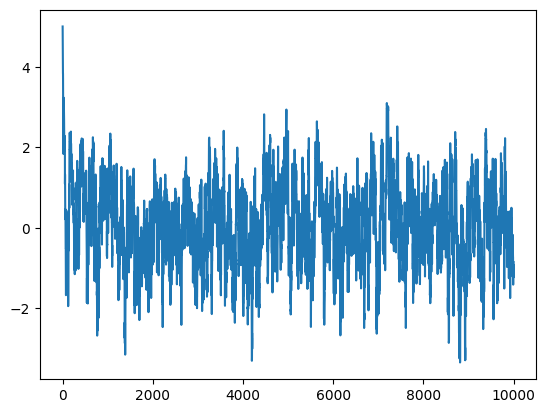

In [ ]:
x = 5  # 초기 x
x_list1 = [x]  # x 값들을 저장할 리스트 초기화

# p(x) 정의: 정규분포의 확률 밀도 함수
def p(x):
    return np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

# q(x|m,s) 정의: Gumbel 분포를 사용한 제안 분포
def q(x, m, s=0.5):
    return 1 / s * np.exp(-(x - m) / s) * np.exp(-np.exp(-(x - m) / s))

T = 10000  # 시뮬레이션 반복 횟수
total_1 = 0  # accept된 횟수를 세기 위한 변수 초기화

# T번 반복하여 Metropolis알고리즘을 수행
for i in range(T):
    next_x = x  # 현재 x 값
    xstar = np.random.gumbel(loc=next_x, scale=0.5)  # 제안 분포로부터 새로운 xstar 값을 샘플링
    # 계산할 acceptance ratio (alpha) 계산
    alpha = min(1, (p(xstar) * q(x=next_x, m=xstar)) / (p(next_x) * q(x=xstar, m=next_x)))

    # Metropolis 알고리즘에 따라 x 값 업데이트 및 accept 여부 결정
    if alpha == 1:
        x = xstar  # alpha가 1이면 항상 새로운 xstar를 선택
        total_1 += 1  # accept 횟수 증가
        x_list1.append(x)  # x 값을 리스트에 추가
    else:
        u = rd.uniform(0, 1)  # 0과 1 사이의 균일 분포에서 난수 u 생성
        if u < alpha:
            x = xstar  # alpha보다 u가 작으면 새로운 xstar를 선택
            total_1 += 1  # accept 횟수 증가
            x_list1.append(x)  # x 값을 리스트에 추가
        else:
            x_list1.append(next_x)  # 아니면 현재 x 값을 유지하고 리스트에 추가

# 시뮬레이션 결과 플롯
plt.plot(x_list1)
plt.xlabel('Iteration')
plt.ylabel('x Value')
plt.title('Metropolis-Hastings Sampling')

# acceptance ratio 출력
print('accept 비율 : ', total_1 / T)


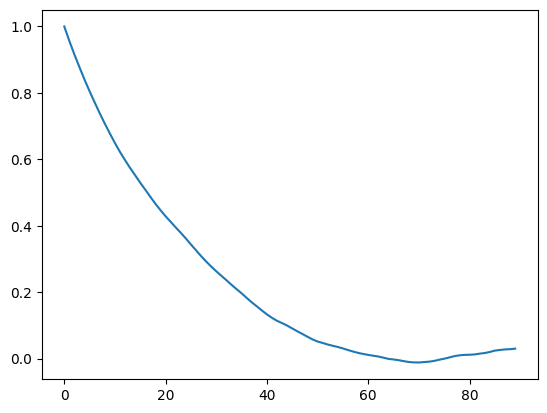

In [ ]:
from pandas import Series

# Series 객체 생성
S_1 = Series(x_list1)

# 자기상관 함수 계산을 위한 빈 리스트 생성
result_1 = []

# lag k에 대해 자기상관 함수를 계산하여 result_1에 저장
for k in range(0, 90):
    result_1.append(S_1.autocorr(k))

# 결과
plt.plot(result_1)

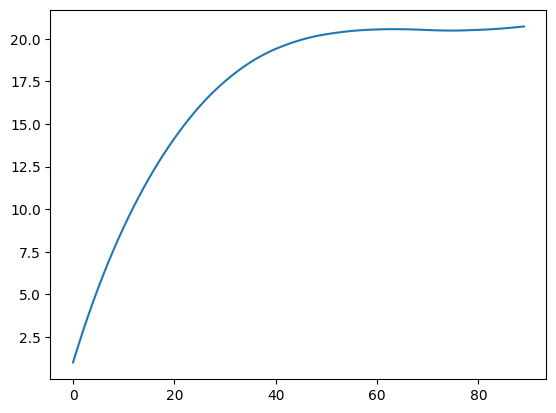

In [ ]:
t_total_1 = 0  # 누적 자기상관 함수 값을 저장할 변수 초기화
correlation_1 = []  # 누적 자기상관 함수 값을 저장할 리스트 초기화

# lag k에 대해 누적 자기상관 함수를 계산하여 correlation_1에 저장
for k in range(0, 90):
    t_total_1 += S_1.autocorr(k)  # lag k에 대한 자기상관 함수 값을 누적하여 계산
    correlation_1.append(t_total_1)  # 누적 자기상관 함수 값을 리스트에 추가

# 결과를 그래프로 플로팅
plt.plot(correlation_1)

S = 100

개수 0.0119


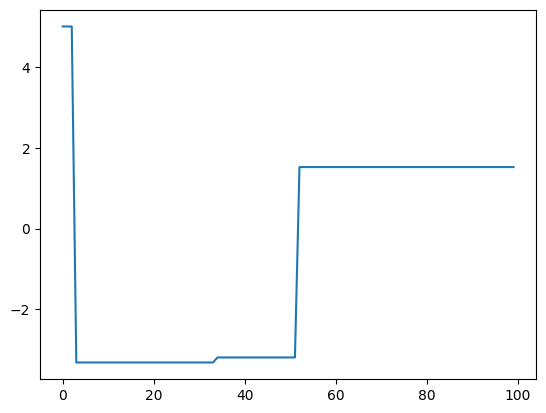

In [ ]:
x = 5  # 초기 x 값
x_list2 = [x]  # x 값들을 저장할 리스트 초기화

# p(x) 정의: 정규분포의 확률 밀도 함수
def p(x):
    return np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

# q(x|m,s) 정의: Gumbel 분포를 사용한 제안 분포
def q(x, m, s=100):
    return 1 / s * np.exp(-(x - m) / s) * np.exp(-np.exp(-(x - m) / s))

T = 10000  # 시뮬레이션 반복 횟수
total_2 = 0  # accept된 횟수를 세기 위한 변수 초기화

# T번 반복하여 Metropolis 알고리즘을 수행
for i in range(T):
    next_x = x  # 현재 x 값
    xstar = np.random.gumbel(loc=next_x, scale=100)  # 제안 분포로부터 새로운 xstar 값을 샘플링
    # 계산할 acceptance ratio (alpha) 계산
    alpha = min(1, (p(xstar) * q(x=next_x, m=xstar)) / (p(next_x) * q(x=xstar, m=next_x)))

    # Metropolis 알고리즘에 따라 x 값 업데이트 및 accept 여부 결정
    if alpha == 1:
        x = xstar  # alpha가 1이면 항상 새로운 xstar를 선택
        total_2 += 1  # accept 횟수 증가
        x_list2.append(x)  # x 값을 리스트에 추가
    else:
        u = rd.uniform(0, 1)  # 0과 1 사이의 균일 분포에서 난수 u 생성
        if u < alpha:
            x = xstar  # alpha보다 u가 작으면 새로운 xstar를 선택
            total_2 += 1  # accept 횟수 증가
            x_list2.append(x)  # x 값을 리스트에 추가
        else:
            x_list2.append(next_x)  # 아니면 현재 x 값을 유지하고 리스트에 추가

# accept 비율 출력
print('accept 비율 : ', total_2 / T)

# 처음 100개 데이터에 대한 결과 시각화
plt.plot(x_list2[:100])



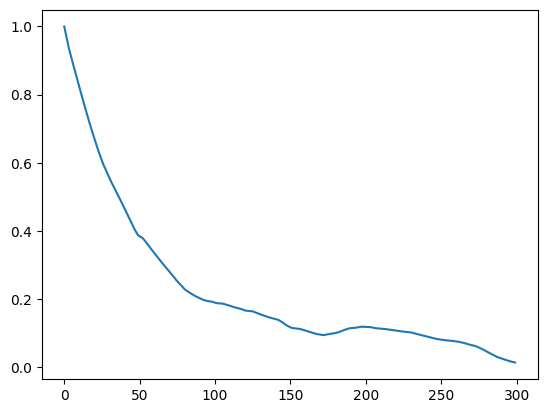

In [ ]:
from pandas import Series

S_2 = Series(x_list2)
result_2 = []
for k in range(0,300):
  result_2.append(S_2.autocorr(k))

plt.plot(result_2)

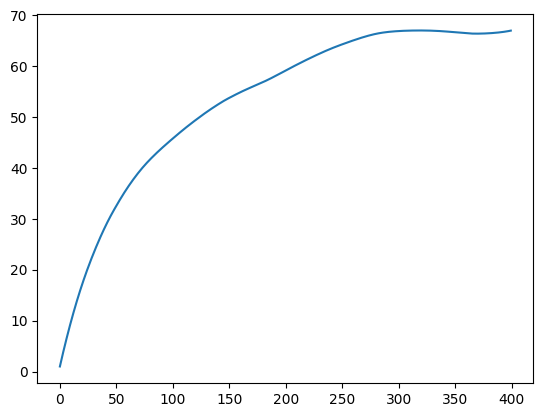

In [ ]:
t_total_2 = 0
correlation_2 = []
for k in range(0,400):
  t_total_2 += S_2.autocorr(k)
  correlation_2.append(t_total_2)
plt.plot(correlation_2)

S =  0.1

개수 0.7383


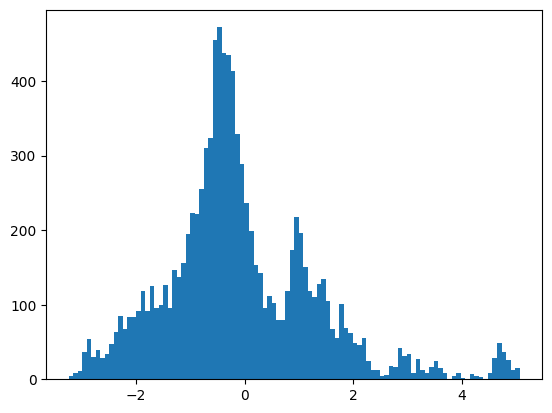

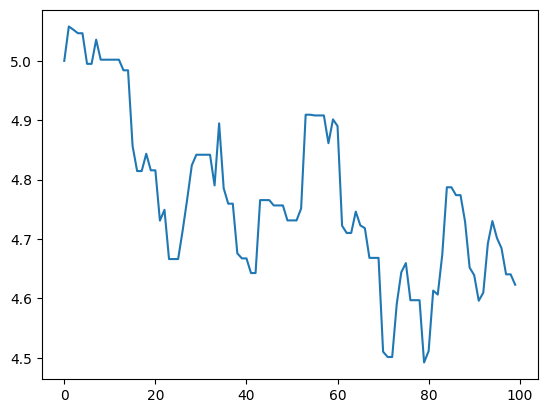

In [ ]:

x = 5 # 초기 x
x_list3 = [x]

def p(x):
  return np.sqrt(2*np.pi) * np.exp(-x**2/2)

def q(x,m,s = 0.1):
  return 1/s * np.exp(-(x-m)/s)*np.exp(-np.exp(-(x-m)/s))

total_3 = 0

for i in range(T):
  next_x = x
  xstar = np.random.gumbel(loc = next_x , scale = 0.1)
  alpha = min(1,(p(xstar)*q(x = next_x ,m=xstar))/(p(next_x)*q(x = xstar ,m = next_x)))
  if alpha == 1:
    x = xstar
    total_3 += 1
    x_list3.append(x)
  else:
    u = rd.uniform(0,1)
    if u < alpha :
      x = xstar
      total_3 += 1
      x_list3.append(x)
    else:
      x_list3.append(next_x)


print('개수',total_3 / T)

plt.hist(x_list3, bins = 100)
plt.show()
plt.plot(x_list3[:100])
plt.show()


S = 0.1

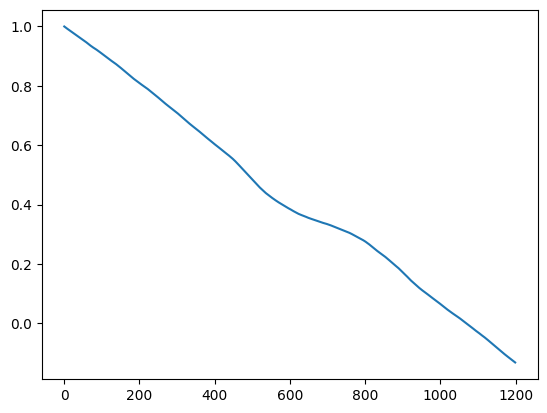

In [ ]:
from pandas import Series

S3 = Series(x_list3)
result_3 = []
for k in range(0,1200):
  result_3.append(S3.autocorr(k))

plt.plot(result_3)

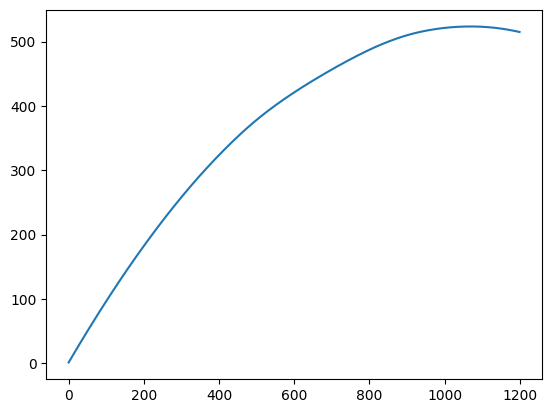

In [ ]:
t_total_3 = 0
correlation_3 = []

for k in range(0,1200):
  t_total_3 += S3.autocorr(k)
  correlation_3.append(t_total_3)

plt.plot(correlation_3)

1) acceptance ratio

In [ ]:
print('s = 0.5 일때 accept 비율 : ', total_1 / T)
print('s = 100 일때 accept 비율 : ', total_2 / T)
print('s = 0.1 일때 accept 비율 : ', total_3 / T)

s = 0.5 일때 accept 비율 :  0.687
s = 100 일때 accept 비율 :  0.0119
s = 0.1 일때 accept 비율 :  0.7383


2) 자기상관함수 도표

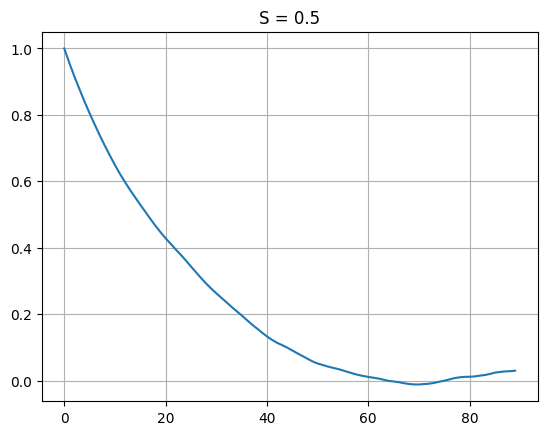

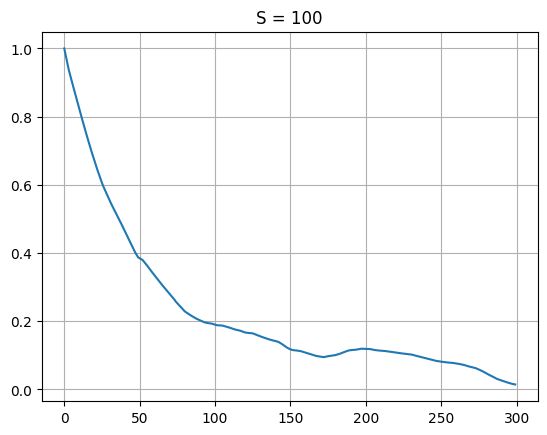

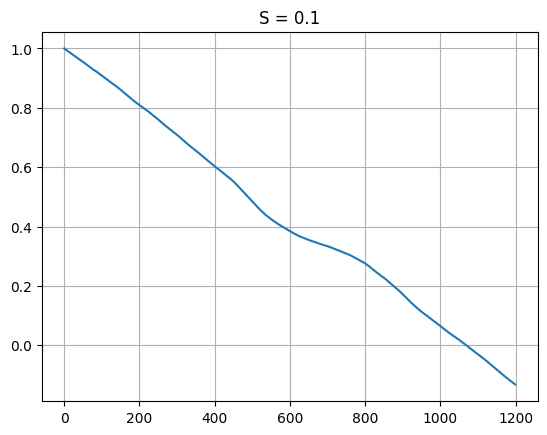

In [ ]:
plt.plot(result_1)
plt.title('S = 0.5')
plt.grid()
plt.show()
plt.plot(result_2)
plt.title('S = 100')
plt.grid()
plt.show()
plt.plot(result_3)
plt.title('S = 0.1')
plt.grid()
plt.show()


3) 상관시간

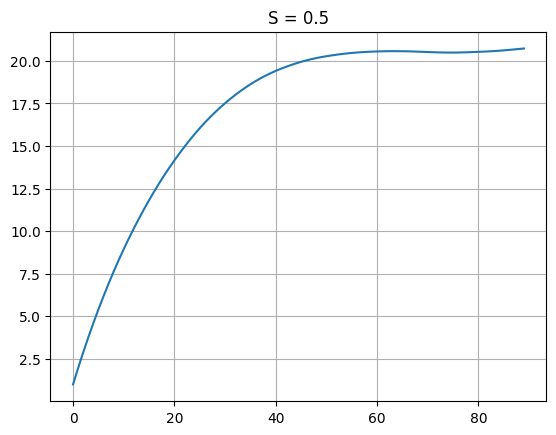

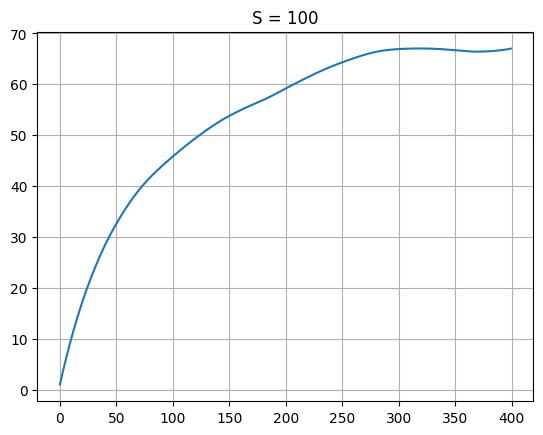

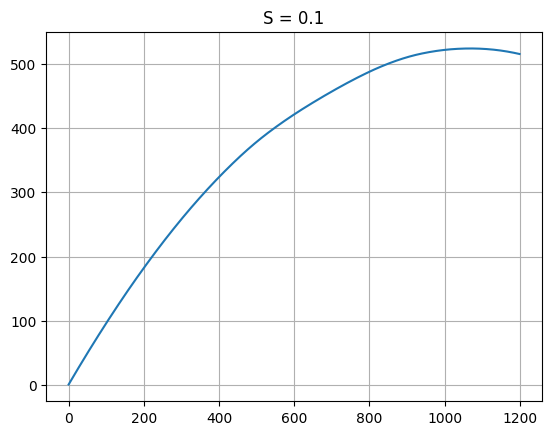

In [ ]:
plt.plot(correlation_1)
plt.title('S = 0.5')
plt.grid()
plt.show()
plt.plot(correlation_2)
plt.title('S = 100')
plt.grid()
plt.show()
plt.plot(correlation_3)
plt.title('S = 0.1')
plt.grid()
plt.show()
